# Introduction  
This notebook focuses on cleaning and processing two datasets:
1. **Eduction Data**: Data provided by UN about education enrollments.

The goal of this notebook is to:
- Load and explore the data.
- Clean and preprocess the data.
- Perform basic analyses and visualization.
- Prepare the data for further exploration or modeling.

# Loading and Cleaning Data

In [490]:
import pandas as pd
import numpy as np

education_data = pd.read_csv('data/raw/un-education-data.csv', encoding='ISO-8859-1')
#public_expenditure_data = pd.read_csv('un-raw-data/public-expenditure-on-education-and-access-to-computers.csv', encoding='ISO-8859-1')

In [491]:
education_data.info()
#public_expenditure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7531 entries, 0 to 7530
Data columns (total 7 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   T07                                                                          7531 non-null   object
 1   Enrollment in primary, lower secondary and upper secondary education levels  7530 non-null   object
 2   Unnamed: 2                                                                   7531 non-null   object
 3   Unnamed: 3                                                                   7531 non-null   object
 4   Unnamed: 4                                                                   7531 non-null   object
 5   Unnamed: 5                                                                   654 non-null    object
 6   Unnamed: 6                                       

First we see that there is an issue with the columns, which has to be fiexed.

In [492]:
education_data.head()

,T07,"Enrollment in primary, lower secondary and upper secondary education levels",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,907",Estimate.,"United Nations Educational, Scientific and Cul..."
2,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (male),104.5,Estimate.,"United Nations Educational, Scientific and Cul..."
3,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.7,NaN,"United Nations Educational, Scientific and Cul..."
4,1,"Total, all countries or areas",2005,Students enrolled in lower secondary education...,"309,665",NaN,"United Nations Educational, Scientific and Cul..."


In [493]:
education_data_cleaning = education_data.drop(index=0)
education_data_cleaning.columns = ['Number', 'Region_Country_Area', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
education_data_cleaning.reset_index(drop=True, inplace=True)
#education_data_cleaning.to_csv('cleaned_education_data.csv', index=False)
education_data_cleaning.head()

,Number,Region_Country_Area,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,907",Estimate.,"United Nations Educational, Scientific and Cul..."
1,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (male),104.5,Estimate.,"United Nations Educational, Scientific and Cul..."
2,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.7,NaN,"United Nations Educational, Scientific and Cul..."
3,1,"Total, all countries or areas",2005,Students enrolled in lower secondary education...,"309,665",NaN,"United Nations Educational, Scientific and Cul..."
4,1,"Total, all countries or areas",2005,Gross enrollment ratio - Lower secondary level...,80.7,NaN,"United Nations Educational, Scientific and Cul..."


In [494]:
#droping columns since some entrys of a columns are idenctical and not importent
print(education_data_cleaning.columns)
education_data_cleaning.drop(columns= ['Source'], inplace=True)

Index(['Number', 'Region_Country_Area', 'Year', 'Series', 'Value', 'Footnotes',
       'Source'],
      dtype='object')


In [495]:
education_data_cleaning.info()
education_data_cleaning.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7530 entries, 0 to 7529
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Number               7530 non-null   object
 1   Region_Country_Area  7530 non-null   object
 2   Year                 7530 non-null   object
 3   Series               7530 non-null   object
 4   Value                7530 non-null   object
 5   Footnotes            653 non-null    object
dtypes: object(6)
memory usage: 353.1+ KB


,Number,Region_Country_Area,Year,Series,Value,Footnotes
0,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,907",Estimate.
1,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (male),104.5,Estimate.
2,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.7,NaN
3,1,"Total, all countries or areas",2005,Students enrolled in lower secondary education...,"309,665",NaN
4,1,"Total, all countries or areas",2005,Gross enrollment ratio - Lower secondary level...,80.7,NaN


### Changing data typs

In [496]:
education_data_cleaning['Year'] = pd.to_numeric(education_data_cleaning['Year'], errors= 'coerce')
education_data_cleaning['Value'] = education_data_cleaning['Value'].replace({',': ''}, regex = True)
education_data_cleaning['Value'] = pd.to_numeric(education_data_cleaning['Value'], errors='coerce')
education_data_cleaning['Region_Country_Area'] = education_data_cleaning['Region_Country_Area'].astype('string')
education_data_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7530 entries, 0 to 7529
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number               7530 non-null   object 
 1   Region_Country_Area  7530 non-null   string 
 2   Year                 7530 non-null   int64  
 3   Series               7530 non-null   object 
 4   Value                7530 non-null   float64
 5   Footnotes            653 non-null    object 
dtypes: float64(1), int64(1), object(3), string(1)
memory usage: 353.1+ KB


Check for duplicates

In [497]:
duplicate_rows = education_data_cleaning[education_data_cleaning.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Number, Region_Country_Area, Year, Series, Value, Footnotes]
Index: []


Check missing data or incorrect entries

In [498]:
missing_data = education_data_cleaning.isnull().sum()
print(missing_data)

Number                    0
Region_Country_Area       0
Year                      0
Series                    0
Value                     0
Footnotes              6877
dtype: int64


In [499]:
unique_footnotes = education_data_cleaning['Footnotes'].unique()
print(unique_footnotes)

['Estimate.' nan]


In [500]:
education_data_cleaning = education_data_cleaning.copy()
education_data_cleaning['Footnotes'] = education_data_cleaning['Footnotes'].fillna('Empty-Field.')

In [501]:
education_data_cleaning.head(20)

,Number,Region_Country_Area,Year,Series,Value,Footnotes
0,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,678907.0,Estimate.
1,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (male),104.5,Estimate.
2,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.7,Empty-Field.
3,1,"Total, all countries or areas",2005,Students enrolled in lower secondary education...,309665.0,Empty-Field.
4,1,"Total, all countries or areas",2005,Gross enrollment ratio - Lower secondary level...,80.7,Empty-Field.
5,1,"Total, all countries or areas",2005,Gross enrollment ratio - Lower secondary level...,76.7,Empty-Field.
6,1,"Total, all countries or areas",2005,Students enrolled in upper secondary education...,199767.0,Empty-Field.
7,1,"Total, all countries or areas",2005,Gross enrollment ratio - Upper secondary level...,51.2,Empty-Field.
8,1,"Total, all countries or areas",2005,Gross enrollment ratio - Upper secondary level...,48.3,Empty-Field.
9,1,"Total, all countries or areas",2010,Students enrolled in primary education (thousa...,697253.0,Empty-Field.


In [502]:
unique_region_country = education_data_cleaning['Region_Country_Area'].unique()
print(unique_region_country)
education_data_cleaning.to_csv("test.csv", index= False)

<StringArray>
['Total, all countries or areas',               'Northern Africa',
            'Sub-Saharan Africa',              'Northern America',
 'Latin America & the Caribbean',                  'Central Asia',
                  'Eastern Asia',            'South-eastern Asia',
                 'Southern Asia',                  'Western Asia',
 ...
                    'Uzbekistan',                       'Vanuatu',
    'Venezuela (Boliv. Rep. of)',                      'Viet Nam',
                         'Yemen',                        'Zambia',
                      'Zimbabwe',                         'LLDCs',
                           'LDC',                          'SIDS']
Length: 226, dtype: string


Name of some countries are not in correct format or is incorrect. 

## Check and Correct Country Names

In [503]:
country_data = pd.read_csv("data/other/country-names-iso3166.csv")
country_data.head()
valid_country_names = country_data['name'].astype('string')
print(valid_country_names)

0            Afghanistan
1          Åland Islands
2                Albania
3                Algeria
4         American Samoa
             ...        
244    Wallis and Futuna
245       Western Sahara
246                Yemen
247               Zambia
248             Zimbabwe
Name: name, Length: 249, dtype: string


In [504]:
import re
def clean_country_name(name):
    # Replace § with an empty string
    name = name.replace("§", "")
    # Remove content in parentheses (e.g., "(Plurin. State of)")
    #name = re.sub(r"\s*\(.*?\)", "", name)
    # Strip extra whitespace
    name = name.strip()
    return name

In [505]:
# There are areas and regions, wich are not defined or containd in the iso3166. Therefor a list containing those names are created to avoid cheching them.
predefined_areas_and_regions = [
    "Total, all countries or areas", "Northern Africa", "Sub-Saharan Africa",
    "Northern America", "Latin America & the Caribbean", "Central Asia",
    "Eastern Asia", "South-eastern Asia", "Southern Asia", "Western Asia",
    "Europe", "Oceania", "LLDCs", "LDC", "SIDS", "Australia and New Zealand",
    "British Virgin Islands", "China, Hong Kong SAR", "China, Macao SAR",
]
# Correct specific known mismatches
name_corrections = {
    "Bolivia (Plurin. State of)": "Bolivia, Plurinational State of",
    "Dem. People's Rep. Korea": "Korea, Democratic People's Republic of",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
}
education_data_cleaning["Region_Country_Area"] = education_data_cleaning["Region_Country_Area"].apply(clean_country_name)
unique_region_country = education_data_cleaning["Region_Country_Area"].unique()
# Striping whitespace from both lists
unique_region_country = [country.strip() for country in unique_region_country]
valid_country_names = [country.strip() for country in valid_country_names]

incorrect_country_names = []
for country in unique_region_country:
    if not (country in valid_country_names or country in predefined_areas_and_regions):
        incorrect_country_names.append(country)

education_data_cleaning['Region_Country_Area'] = education_data_cleaning['Region_Country_Area'].replace(name_corrections)
if not (incorrect_country_names):
    print("correct country names")
else:
    print("incorrect country names or unkown region found")
    print(incorrect_country_names)
    print(valid_country_names)

incorrect country names or unkown region found
['Bolivia (Plurin. State of)', "Cote d'Ivoire", 'Curacao', "Dem. People's Rep. Korea", 'Dem. Rep. of the Congo', 'Iran (Islamic Republic of)', "Lao People's Dem. Rep.", 'Micronesia (Fed. States of)', 'Netherlands (Kingdom of the)', 'Republic of Korea', 'Republic of Moldova', 'Saint Vincent & Grenadines', 'State of Palestine', 'Sudan [former]', 'Turkiye', 'United Kingdom', 'United Rep. of Tanzania', 'Venezuela (Boliv. Rep. of)']
['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulga

We see above that there are names which does not match exaclty in both datasets but both are correct. We can here ignore them

## Find Possible Outliers

In [506]:
negative_values = education_data_cleaning[education_data_cleaning["Value"] < 0]
if not (negative_values.isnull):
    print("Negative values found")
else:
    print("No negative values found")

No negative values found


In [507]:
# Filter rows where the Series column indicates "thousands"
thousands_data = education_data_cleaning[
    education_data_cleaning['Series'].str.contains('thousands', case=False, na=False)
]
Q1 = thousands_data['Value'].quantile(0.25)
Q3 = thousands_data['Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_thousands_data = thousands_data[
    (thousands_data['Value'] >= lower_bound) &
    (thousands_data['Value'] <= upper_bound)
]


# Convert the 'Value' column to a NumPy array
values_array = filtered_thousands_data['Value'].to_numpy()

# Print the array to verify
print(values_array)



[2582. 4335. 2738. ... 2270. 2734. 1890.]


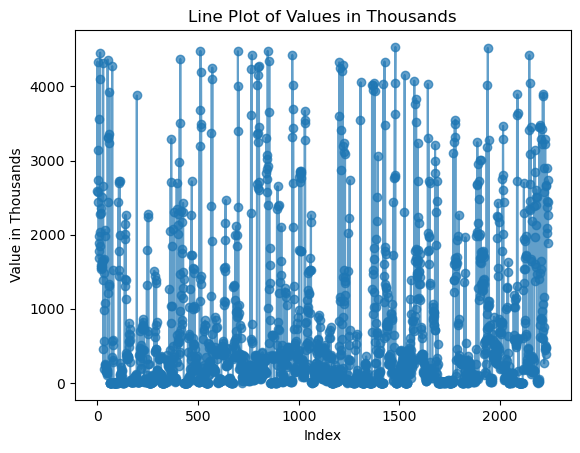

In [513]:
import matplotlib.pyplot as plt

# Plot the array values as a line plot
plt.plot(values_array, marker='o', linestyle='-', alpha=0.7)
plt.title("Line Plot of Values in Thousands")
plt.xlabel("Index")
plt.ylabel("Value in Thousands")
plt.show()


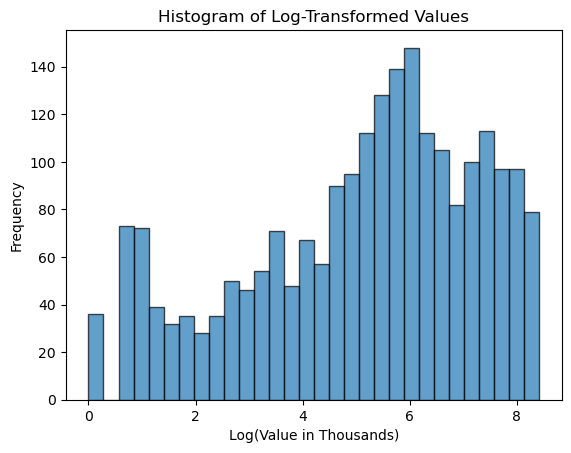

In [510]:
import numpy as np

# Apply log transformation
log_values_array = np.log1p(values_array)

# Plot the log-transformed data
plt.hist(log_values_array, bins=30, alpha=0.7, edgecolor='black')
plt.title("Histogram of Log-Transformed Values")
plt.xlabel("Log(Value in Thousands)")
plt.ylabel("Frequency")
plt.show()


countinue...